In [ ]:
%load_ext autoreload
%autoreload 2
from src import ODE_euler

[02-05 08:04:02][INFO] 2025-02-05 08:04:02.692774
[02-05 08:04:04][INFO] 2025-02-05 08:04:04.790317
[02-05 08:04:04][INFO] 2025-02-05 08:04:04.805294


In [46]:
import math

# Definición de la función diferencial
def f(t: float, y: float) -> float:
    return y - t**2 + 1

# Definición de parámetros del problema
a = 0
b = 2
y_t0 = (0 + 1) ** 2 - 0.5 * math.exp(0)
N = 10

# Resolución del problema mediante el método de Euler
y, t, h = ODE_euler(a=a, b=b, f=f, y_t0=y_t0, N=N)

# Cálculo de la solución exacta
y_exact = [(ti + 1) ** 2 - 0.5 * math.exp(ti) for ti in t]
error = [yi - y_exact_i for yi, y_exact_i in zip(y, y_exact)]

# Impresión de resultados
print("t:", t)
print("y:", y)

t: [0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0, 1.2, 1.4, 1.5999999999999999, 1.7999999999999998, 1.9999999999999998]
y: [0.5, 0.8, 1.1520000000000001, 1.5504000000000002, 1.9884800000000002, 2.4581760000000004, 2.9498112000000005, 3.4517734400000006, 3.950128128000001, 4.428153753600001, 4.865784504320001]


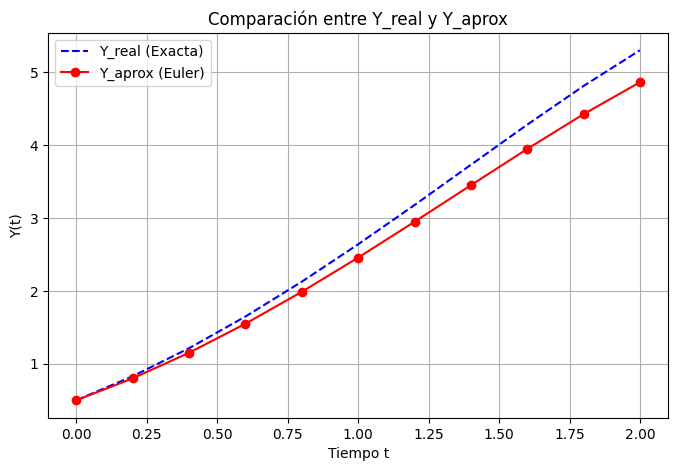

In [48]:
import matplotlib.pyplot as plt

# Resolución del problema mediante el método de Euler
y_aprox, t, h = ODE_euler(a=a, b=b, f=f, y_t0=y_t0, N=N)

# Cálculo de la solución exacta
y_real = [(ti + 1) ** 2 - 0.5 * math.exp(ti) for ti in t]

plt.figure(figsize=(8, 5))
plt.plot(t, y_real, label="Y_real (Exacta)", linestyle="dashed", color="blue")
plt.plot(t, y_aprox, label="Y_aprox (Euler)", marker="o", color="red")
plt.xlabel("Tiempo t")
plt.ylabel("Y(t)")
plt.title("Comparación entre Y_real y Y_aprox")
plt.legend()
plt.grid(True)
plt.show()

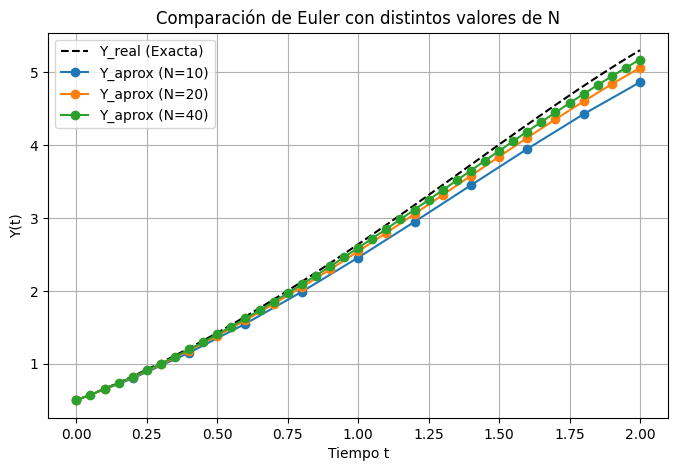

In [50]:
# Valores de N a comparar
N_values = [10, 20, 40]

# Cálculo de la solución exacta para referencia
t_exact = [a + i * (b - a) / 100 for i in range(101)]
y_exact = [(ti + 1) ** 2 - 0.5 * math.exp(ti) for ti in t_exact]

# Configuración de la figura
plt.figure(figsize=(8, 5))

# Graficar la solución exacta
plt.plot(t_exact, y_exact, label="Y_real (Exacta)", linestyle="dashed", color="black")

# Graficar las soluciones aproximadas para cada N
for N in N_values:
    y_aprox, t, _ = ODE_euler(a=a, b=b, f=f, y_t0=y_t0, N=N)
    plt.plot(t, y_aprox, marker="o", label=f"Y_aprox (N={N})")

# Configuración del gráfico
plt.xlabel("Tiempo t")
plt.ylabel("Y(t)")
plt.title("Comparación de Euler con distintos valores de N")
plt.legend()
plt.grid(True)
plt.show()

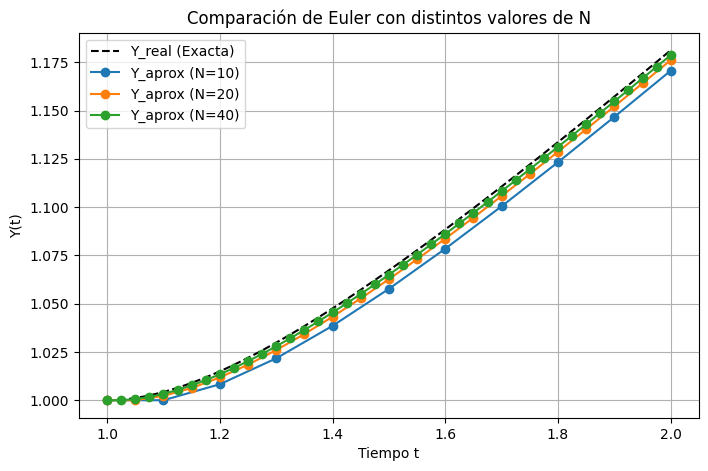

In [53]:
def f(t: float, y: float) -> float:
    return (y/t) - (y/t)**2

a = 1
b = 2
y_t0 = 1

N_values = [10, 20, 40]

t_exact = [a + i * (b - a) / 100 for i in range(101)]
y_exact = [ti / (1 + math.log(ti)) for ti in t_exact]
plt.figure(figsize=(8, 5))
plt.plot(t_exact, y_exact, label="Y_real (Exacta)", linestyle="dashed", color="black")

for N in N_values:
    y_aprox, t, _ = ODE_euler(a=a, b=b, f=f, y_t0=y_t0, N=N)
    plt.plot(t, y_aprox, marker="o", label=f"Y_aprox (N={N})")

plt.xlabel("Tiempo t")
plt.ylabel("Y(t)")
plt.title("Comparación de Euler con distintos valores de N")
plt.legend()
plt.grid(True)
plt.show()

¿Qué pasa al aumentar N?

Al aumentar N, la solución de Euler se aproxima mejor a la solución exacta, ya que el error global está relacionado con el tamaño del paso, y al reducirse este paso con un mayor N, el error disminuye. Con valores bajos de N, la aproximación se aleja de la solución real, mientras que con valores más altos, los puntos generados se ajustan mejor a la solución exacta. Sin embargo, el método de Euler tiene un orden de precisión bajo, lo que significa que no es tan preciso como otros métodos más avanzados. Además, al aumentar N, se requiere más tiempo de cálculo, lo que puede hacer que el método sea menos eficiente en problemas más complejos o con intervalos más largos.